In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression #

In [2]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

In [3]:
# load dataset

data = pd.read_csv('customer_churn_dataset-testing-master.csv')

data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [10]:
# print the shape of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (64374, 9)


In [11]:
# check data for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 CustomerID          0
Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
dtype: int64


In [6]:
# remove non-numeric columns
data = data.select_dtypes(include=[np.number])

In [17]:
# feature matrix and target vector
X = data[['CustomerID', 'Churn']]
y = data['Churn']

print(X.head())
print(y.head())

   CustomerID  Churn
0           1      1
1           2      0
2           3      0
3           4      0
4           5      0
0    1
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


In [ ]:
# Implementing Logistic Regression
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      6793
           1       0.80      0.82      0.81      6082

    accuracy                           0.82     12875
   macro avg       0.82      0.82      0.82     12875
weighted avg       0.82      0.82      0.82     12875



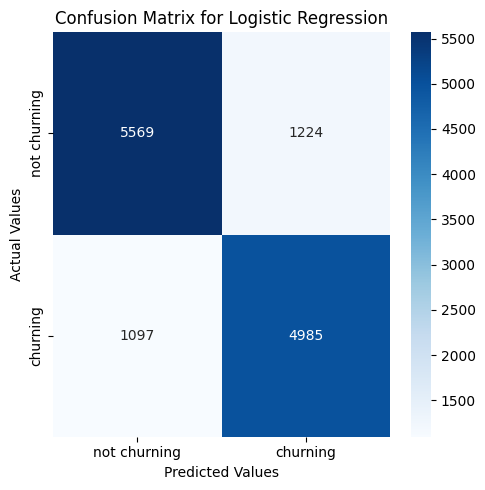

In [20]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred)
fig, axes = plt.subplots(figsize=(5,5))
 
sns.heatmap(cm_lr, xticklabels=['not churning', 'churning'], 
            yticklabels=['not churning', 'churning'], 
            cmap='Blues', annot=True, fmt='d', ax=axes)

axes.set_title('Confusion Matrix for Logistic Regression')
axes.set_xlabel('Predicted Values')
axes.set_ylabel('Actual Values')

plt.tight_layout()
plt.show()